# Import required library

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input,Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Read dataset and do pre-processing

In [31]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [32]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

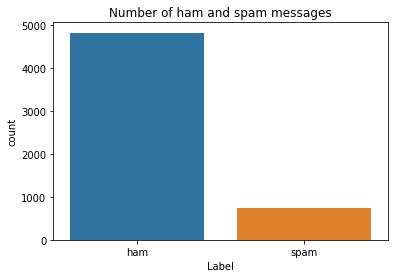

In [33]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')


#Create Model

In [5]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)


In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,
random_state=7)


In [43]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)



#Add Layers (LSTM, Dense-(Hidden Layers), Output)

In [8]:
model=Sequential()
model.add(Embedding(max_words,50,input_length=max_len))
model.add(LSTM(64))
model.add(Dense(256,name='FC1'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1,name='out_layer'))
model.add(Activation('sigmoid'))


#Compile the Model

In [36]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])

#Fit the Model

In [ ]:
data = model.fit(sequences_matrix,Y_train,batch_size=16,epochs=10,validation_split=0.25)

Epoch 1/10
183/183 [==============================] - 30s 124ms/step - loss: 0.1500 - accuracy: 0.9480 - val_loss: 0.0704 - val_accuracy: 0.9805
Epoch 2/10
183/183 [==============================] - 17s 91ms/step - loss: 0.0417 - accuracy: 0.9877 - val_loss: 0.0726 - val_accuracy: 0.9836
Epoch 3/10
183/183 [==============================] - 21s 112ms/step - loss: 0.0321 - accuracy: 0.9925 - val_loss: 0.0749 - val_accuracy: 0.9856
Epoch 4/10
183/183 [==============================] - 16s 85ms/step - loss: 0.0296 - accuracy: 0.9915 - val_loss: 0.0630 - val_accuracy: 0.9856
Epoch 5/10
183/183 [==============================] - 17s 92ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0745 - val_accuracy: 0.9846
Epoch 6/10
183/183 [==============================] - 16s 88ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0863 - val_accuracy: 0.9867
Epoch 7/10
183/183 [==============================] - 17s 90ms/step - loss: 0.0105 - accuracy: 0.9973 - val_loss: 0.0969 - val_accurac

# Save The Model

In [47]:
model.save('Spam_Detector_model.h5')

#Test The Model

In [48]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)
test_accuracy = model.evaluate(test_sequences_matrix,Y_test)

53/53 [==============================] - 1s 24ms/step - loss: 0.2087 - accuracy: 0.9779


In [53]:
model.metrics_names
['loss', 'accuracy']
print('Test Loss: {:0.4f} and Test Accuracy: {:0.2f}%'.format(test_accuracy[0],test_accuracy[1]*100))

Test Loss: 0.2087 and Test Accuracy: 97.79%
